# Keras iris Modeling

In [ ]:
import warnings
warnings.filterwarnings('ignore')

* 실습용 데이터 설정
 - iris.csv

In [ ]:
import seaborn as sns

iris = sns.load_dataset('iris')

* pandas DataFrame

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# I. Data Preprocessing

> ## 1) iris.Species 빈도분석

* Species : setosa, virginica, versicolor

In [ ]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

> ## 2) DataFrame to Array & Casting

In [ ]:
iris_TR = iris.values

iris_TR

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

* object to float

In [ ]:
TR_X = iris_TR[:,0:4].astype(float)
TR_Y = iris_TR[:,4]

TR_X.shape, TR_Y.shape

((150, 4), (150,))

> ## 3) One Hot Encoding with sklearn & Keras

* ['setosa', 'virginica', 'virsicolor'] to [0, 1, 2]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
TR_YL = encoder.fit_transform(TR_Y)

TR_YL

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* to_categorical( )

In [ ]:
import tensorflow as tf

TR_YO = tf.keras.utils.to_categorical(TR_YL)

TR_YO

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

> ## 4) Train & Test Split with sklearn Package

* 7 : 3

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(TR_X, TR_YO, 
                                                    test_size = 0.3, 
                                                    random_state = 2045) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

# II. Keras Modeling

> ## 1) Keras models & layers Import

In [ ]:
from keras import models
from keras import layers

> ## 2) Model Define

* 모델 신경망 구조 정의

In [ ]:
Model_iris = models.Sequential()

Model_iris.add(layers.Dense(16, activation = 'relu', input_shape = (4,)))
Model_iris.add(layers.Dense(8, activation = 'relu'))
Model_iris.add(layers.Dense(3, activation = 'softmax'))

* 모델 구조 확인

In [ ]:
Model_iris.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


> ## 3) Model Compile

* 모델 학습방법 설정

In [ ]:
Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

> ## 4) Model Fit

* 모델 학습 수행

In [ ]:
History_iris = Model_iris.fit(x_train, y_train,
                              epochs = 500,
                              batch_size = 7,
                              validation_data = (x_test, y_test))

Epoch 1/500
15/15 [==============================] - 15s 39ms/step - loss: 1.2415 - accuracy: 0.3505 - val_loss: 1.1786 - val_accuracy: 0.6000
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 1.1614 - accuracy: 0.5804 - val_loss: 1.1221 - val_accuracy: 0.6222
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 1.0524 - accuracy: 0.6489 - val_loss: 1.0710 - val_accuracy: 0.6000
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9954 - accuracy: 0.6849 - val_loss: 1.0376 - val_accuracy: 0.6000
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9869 - accuracy: 0.6526 - val_loss: 1.0067 - val_accuracy: 0.6000
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9684 - accuracy: 0.6258 - val_loss: 0.9772 - val_accuracy: 0.6000
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9253 - accuracy: 0.6889 - val_loss: 0.9510 - val_accuracy: 0.6000
Epoch 8/500

> ## 5) 학습 결과 시각화

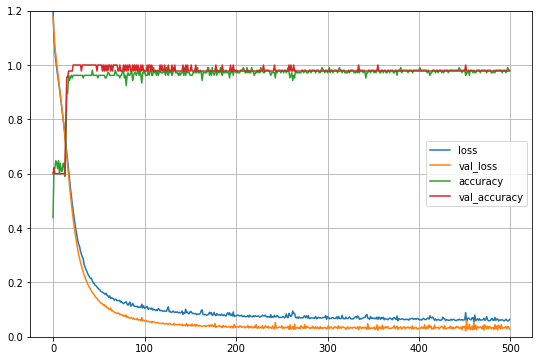

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.ylim(0, 1.2)
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['accuracy'])
plt.plot(History_iris.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = Model_iris.evaluate(x_test, y_test)

print('Loss = {:.2f}'.format(loss))
print('Accuracy = {:.2f}'.format(accuracy))

2/2 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.9778
Loss = 0.03
Accuracy = 0.98


> ## 7) Model Predict

* Probability

In [ ]:
import numpy as np
np.set_printoptions(suppress = True, precision = 5)

Model_iris.predict(x_test)

array([[0.99962, 0.00038, 0.     ],
       [0.99767, 0.00233, 0.     ],
       [0.00652, 0.99344, 0.00004],
       [0.     , 0.00006, 0.99994],
       [0.99986, 0.00014, 0.     ],
       [0.00026, 0.99963, 0.00011],
       [0.     , 0.0031 , 0.9969 ],
       [0.99985, 0.00015, 0.     ],
       [0.     , 0.00038, 0.99962],
       [0.99961, 0.00039, 0.     ],
       [0.00001, 0.87982, 0.12017],
       [0.     , 0.00137, 0.99863],
       [0.     , 0.99782, 0.00218],
       [0.99995, 0.00005, 0.     ],
       [0.9999 , 0.0001 , 0.     ],
       [0.00002, 0.99682, 0.00316],
       [0.     , 0.98561, 0.01438],
       [0.99961, 0.00039, 0.     ],
       [0.00001, 0.99973, 0.00027],
       [0.99988, 0.00012, 0.     ],
       [0.99969, 0.00031, 0.     ],
       [0.99966, 0.00034, 0.     ],
       [0.     , 0.0004 , 0.9996 ],
       [0.99978, 0.00022, 0.     ],
       [0.     , 0.03137, 0.96863],
       [0.     , 0.00578, 0.99422],
       [0.99982, 0.00018, 0.     ],
       [0.     , 0.9976 , 0.

* Class

In [ ]:
y_hat = Model_iris.predict_classes(x_test)

y_hat

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

* Probability to Class

In [ ]:
np.argmax(Model_iris.predict(x_test), axis = 1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

* One-Hot Encoding to Array
 * np.argmax( ) : 다차원 배열의 차원에 따라 가장 큰 값의 인덱스를 반환
 * axis = 1 : 열기준

In [ ]:
y = np.argmax(y_test, axis = 1)

y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

* Confusion Matrix & Claasification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 13]])

In [ ]:
print(classification_report(y, y_hat, 
                            target_names = ['setosa',
                                            'virginica',
                                            'versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
   virginica       0.93      1.00      0.97        14
  versicolor       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# III. Model Save & Load

> ## 1) File System

* Save to Colab File System

In [ ]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Jul 15 13:38 sample_data


In [ ]:
Model_iris.save('Model_iris.h5')

!ls -l

total 40
-rw-r--r-- 1 root root 34600 Jul 18 08:27 Model_iris.h5
drwxr-xr-x 1 root root  4096 Jul 15 13:38 sample_data


* Download Colab File System to Local File System

In [ ]:
from google.colab import files

files.download('Model_iris.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Load from Colab File System

In [ ]:
from keras.models import load_model

Model_local = load_model('Model_iris.h5')

In [ ]:
Model_local.predict_classes(x_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

> ## 2) Google Drive

* Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* Check Mounted_Drive

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets'

total 3850171
-rw------- 1 root root   31374019 Mar 27 09:41 Camel.zip
-rw------- 1 root root      20066 Mar  4 04:45 cat.1700.jpg
-rw------- 1 root root   69155672 Mar  4 04:46 creditCardFraud.zip
-rw------- 1 root root   82003032 Mar 23 07:53 DataSet.pkl
-rw------- 1 root root   90618980 Mar  4 04:51 dogs_and_cats_small.zip
-rw------- 1 root root   54561944 Mar 27 09:42 Face.zip
-rw------- 1 root root  862182613 Mar 21 03:21 GloVe.zip
-rw------- 1 root root  149574867 Apr 12 01:53 horse-or-human.zip
drwx------ 2 root root       4096 Mar  4 05:34 image
-rw------- 1 root root 1245927936 Mar 12 01:01 imagenetV2.zip
-rw------- 1 root root    8204887 Mar  4 04:45 Images_500.zip
-rw------- 1 root root   60711700 Mar 21 01:09 IMDB.zip
-rw------- 1 root root    4240457 Mar 14 09:13 Kaggle_Customer_Satisfaction.zip
-rw------- 1 root root   80596565 May  4  2020 ko_w2v.zip
-rw------- 1 root root   12929865 Mar  4 04:42 Logo_Data.zip
-rw------- 1 root root   18272469 Mar  4 04:50 MNIST.csv
-rw-

In [ ]:
import pandas as pd

DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/PII.csv')

DF.head(3)

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2


* Save to Mounted Google Drive Directory

In [ ]:
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 81088
-rw------- 1 root root    34600 Jul 18 08:27 001_Model_iris.h5
-rw------- 1 root root 41498896 May 14 01:20 002_dogs_and_cats_small.h5
-rw------- 1 root root 41499744 May 14 02:03 003_dogs_and_cats_augmentation.h5


* Load from Mounted Google Drive Directory

In [ ]:
from keras.models import load_model

Model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [ ]:
Model_google.predict_classes(x_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

# 
# 
# 
# The End
# 
# 
# 